In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species_list = ['dmel', 'dsim', 'dana', 'dvir', 'sleb']

In [3]:
npg_palette2 = ["#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(npg_palette2)

import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

npg_palette = ["#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF"]
sns.set_palette(npg_palette)

sns.set_style('white', {'axes.linewidth': 0.85})
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

In [65]:
# Load expression data for each species
dmel_ex = pd.read_csv('../conserve/pr_TPM/Dmel_comb_TPM.txt', sep='\t', header=0)
dsim_ex = pd.read_csv('../conserve/pr_TPM/Dsim_comb_TPM.txt', sep='\t', header=0)
dana_ex = pd.read_csv('../conserve/pr_TPM/Dana_comb_TPM.txt', sep='\t', header=0)
dvir_ex = pd.read_csv('../conserve/pr_TPM/Dvir_comb_TPM.txt', sep='\t', header=0)
sleb_ex = pd.read_csv('../conserve/pr_TPM/Sleb_comb_TPM.txt', sep='\t', header=0)

In [28]:
gene43920={}
gene43920['dmel'] = dmel_ex[dmel_ex['Gene ID']=='FBgn0264541']
gene43920['dsim'] = dsim_ex[dsim_ex['Gene ID']=='gene-LOC27207521']
gene43920['dana'] = dana_ex[dana_ex['Gene ID']=='gene-LOC116654794']

/Users/cong/opt/anaconda3/envs/research_py39/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/cong/opt/anaconda3/envs/research_py39/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


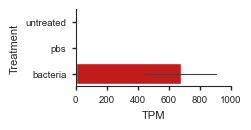

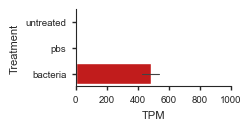

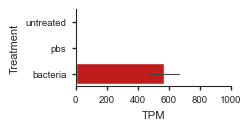

In [29]:
# Convert wide format to long format
for sp in species_list[:3]:
    gene = gene43920[sp]
    gene = gene.rename(columns={'TPM': 'TPM.0'})
    df_long = gene.melt(id_vars=['Gene ID'], value_vars=['TPM.0', 'TPM.1', 'TPM.2', 'TPM.3', 'TPM.4', 'TPM.5', 'TPM.6', 'TPM.7', 'TPM.8'],
                       var_name='Sample', value_name='TPM_value')
    
    treatment_map = {0: "untreated", 1: "pbs", 2: "bacteria"}
    
    df_long['Treatment'] = df_long['Sample'].apply(lambda x: treatment_map[int(x.split(".")[-1]) // 3])
    df_long['Replicate'] = df_long['Sample'].apply(lambda x: f'Rep {int(x.split(".")[-1]) % 3 + 1}')
    
    
    #df_long['TPM_value'] = df_long['TPM_value'].replace(0, 1e-2) 
    df_long['Log10_TPM'] = np.log10(df_long['TPM_value'])
    
    plt.figure(figsize=(2, 1))
    ax = sns.barplot(data=df_long, y='Treatment', x='TPM_value', hue='Treatment', errorbar='se', err_kws={"linewidth": 0.8}, 
                     orient='h', palette=npg_palette2[:3])

    plt.xlim(0,1000)
    #plt.title("TPM Values Across Treatments and Replicates")
    plt.ylabel("Treatment", size=8)
    plt.xlabel("TPM",size=8)
    ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
    sns.despine() # remove top and right spines
    
    #plt.show()
    plt.savefig(f"CG43920_{sp}_expr.svg", dpi=300)

In [61]:
# Load expression data for each species
dmel_ex = pd.read_csv('../conserve/ef_TPM/Dmel_comb_TPM.txt', sep='\t', header=0)
dsim_ex = pd.read_csv('../conserve/ef_TPM/Dsim_comb_TPM.txt', sep='\t', header=0)
dana_ex = pd.read_csv('../conserve/ef_TPM/Dana_comb_TPM.txt', sep='\t', header=0)
dvir_ex = pd.read_csv('../conserve/ef_TPM/Dvir_comb_TPM.txt', sep='\t', header=0)
sleb_ex = pd.read_csv('../conserve/ef_TPM/Sleb_comb_TPM.txt', sep='\t', header=0)

In [19]:
daisho2 = {}
daisho2['dmel'] = dmel_ex[dmel_ex['Gene ID']=='FBgn0067905']
daisho2['dsim'] = dsim_ex[dsim_ex['Gene ID']=='gene-LOC120284339']
daisho2['dana'] = dana_ex[dana_ex['Gene ID']=='gene-LOC116654705']
daisho2['dvir'] = dvir_ex[dvir_ex['Gene ID']=='gene-LOC116650903']
daisho2['sleb'] = sleb_ex[sleb_ex['Gene ID']=='gene-LOC115634008']

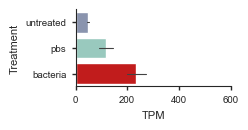

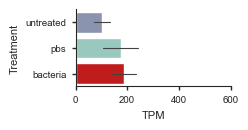

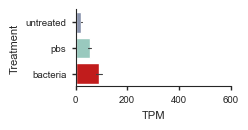

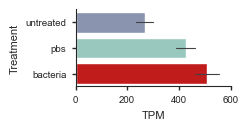

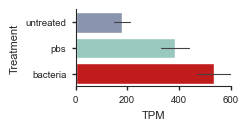

In [27]:
# Convert wide format to long format

for sp in species_list:
    gene = daisho2[sp]
    gene = gene.rename(columns={'TPM': 'TPM.0'})
    df_long = gene.melt(id_vars=['Gene ID'], value_vars=['TPM.0', 'TPM.1', 'TPM.2', 'TPM.3', 'TPM.4', 'TPM.5', 'TPM.6', 'TPM.7', 'TPM.8'],
                       var_name='Sample', value_name='TPM_value')
    
    treatment_map = {0: "untreated", 1: "pbs", 2: "bacteria"}
    
    df_long['Treatment'] = df_long['Sample'].apply(lambda x: treatment_map[int(x.split(".")[-1]) // 3])
    df_long['Replicate'] = df_long['Sample'].apply(lambda x: f'Rep {int(x.split(".")[-1]) % 3 + 1}')
    
    
    #df_long['TPM_value'] = df_long['TPM_value'].replace(0, 1e-2) 
    df_long['Log10_TPM'] = np.log10(df_long['TPM_value'])
    
    plt.figure(figsize=(2, 1))
    ax = sns.barplot(data=df_long, y='Treatment', x='TPM_value', hue='Treatment', errorbar='se', err_kws={"linewidth": 0.8}, 
                     orient='h', palette=npg_palette2[:3])

    plt.xlim(0,600)
    #plt.title("TPM Values Across Treatments and Replicates")
    plt.ylabel("Treatment", size=8)
    plt.xlabel("TPM",size=8)
    ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
    sns.despine() # remove top and right spines
    
    #plt.show()
    plt.savefig(f"daisho2_{sp}_expr.svg", dpi=300)

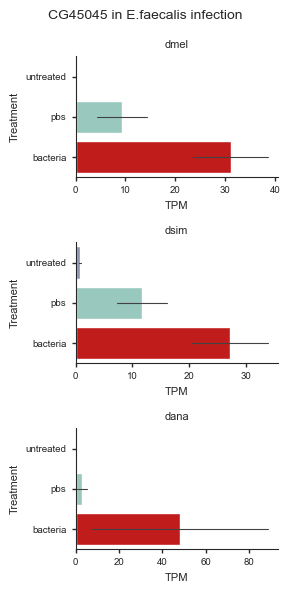

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up 1 row x 3 columns for subplots
#fig, axs = plt.subplots(1, 3, figsize=(6, 2))  # 3 subplots side by side
fig, axs = plt.subplots(3, 1, figsize=(3, 6))

species_list = ['dmel', 'dsim', 'dana']
gene_ids = ['FBgn0266405', 'gene-LOC120284931', 'gene-LOC123257230']
CG45045 = {
    'dmel': dmel_ex[dmel_ex['Gene ID'] == gene_ids[0]],
    'dsim': dsim_ex[dsim_ex['Gene ID'] == gene_ids[1]],
    'dana': dana_ex[dana_ex['Gene ID'] == gene_ids[2]],
}

treatment_map = {0: "untreated", 1: "pbs", 2: "bacteria"}

for i, sp in enumerate(species_list):
    gene = CG45045[sp].copy()
    gene = gene.rename(columns={'TPM': 'TPM.0'})
    df_long = gene.melt(
        id_vars=['Gene ID'],
        value_vars=[f'TPM.{i}' for i in range(9)],
        var_name='Sample',
        value_name='TPM_value'
    )

    df_long['Treatment'] = df_long['Sample'].apply(lambda x: treatment_map[int(x.split(".")[-1]) // 3])
    df_long['Replicate'] = df_long['Sample'].apply(lambda x: f'Rep {int(x.split(".")[-1]) % 3 + 1}')

    sns.barplot(
        data=df_long, y='Treatment', x='TPM_value', hue='Treatment',
        errorbar='se', err_kws={"linewidth": 0.8}, orient='h',
        palette=npg_palette2[:3], ax=axs[i], legend=False
    )

    axs[i].set_title(sp, fontsize=8)
    axs[i].set_xlabel("TPM", fontsize=8)
    axs[i].set_ylabel("Treatment", fontsize=8)
    axs[i].tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
    sns.despine(ax=axs[i])

# Adjust spacing between subplots
plt.suptitle("CG45045 in E.faecalis infection", fontsize=10)
#plt.suptitle("CG45045 in P.rettgeri infection", fontsize=10)
plt.tight_layout()
plt.savefig("CG45045_combined_expression_ef.pdf", dpi=300)


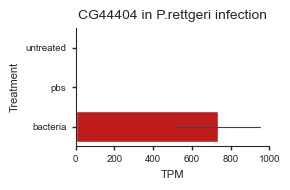

In [66]:
# Convert wide format to long format

CG44404 = dmel_ex[dmel_ex['Gene ID'] == 'FBgn0265577']
    
sp='dmel'
gene = CG44404
gene = gene.rename(columns={'TPM': 'TPM.0'})
df_long = gene.melt(id_vars=['Gene ID'], value_vars=['TPM.0', 'TPM.1', 'TPM.2', 'TPM.3', 'TPM.4', 'TPM.5', 'TPM.6', 'TPM.7', 'TPM.8'],
                   var_name='Sample', value_name='TPM_value')

treatment_map = {0: "untreated", 1: "pbs", 2: "bacteria"}

df_long['Treatment'] = df_long['Sample'].apply(lambda x: treatment_map[int(x.split(".")[-1]) // 3])
df_long['Replicate'] = df_long['Sample'].apply(lambda x: f'Rep {int(x.split(".")[-1]) % 3 + 1}')


#df_long['TPM_value'] = df_long['TPM_value'].replace(0, 1e-2) 
#df_long['Log10_TPM'] = np.log10(df_long['TPM_value'])

plt.figure(figsize=(3, 2))
ax = sns.barplot(data=df_long, y='Treatment', x='TPM_value', hue='Treatment', errorbar='se', err_kws={"linewidth": 0.8}, 
                 orient='h', palette=npg_palette2[:3])

#plt.xlim(0,600)
plt.title("CG44404 in P.rettgeri infection", size=10)
#plt.title("CG44404 in E.faecalis infection", size=10)
plt.ylabel("Treatment", size=8)
plt.xlabel("TPM",size=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
sns.despine() # remove top and right spines

#plt.show()
plt.tight_layout()
plt.savefig(f"CG44404_{sp}_expr_pr.pdf", dpi=300)